# Smart Factory Energy Consumption Prediction

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
url = 'https://raw.githubusercontent.com/Mechademy-Git/DS-Intern-Assignment/refs/heads/main/data/data.csv'
df = pd.read_csv(url)
df.head()


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


# Timestamp to datetime


In [92]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday 
df['day_of_week'] = df['timestamp'].dt.day_name()  
df['quarter'] = df['timestamp'].dt.quarter


In [93]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,dew_point,random_variable1,random_variable2,day,month,year,hour,weekday,day_of_week,quarter
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,5.300000,13.275433,13.275433,11,1,2016,17,0,Monday,1
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,5.200000,18.606195,18.606195,11,1,2016,17,0,Monday,1
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,5.100000,28.642668,28.642668,11,1,2016,17,0,Monday,1
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,37.673716,45.410389,45.410389,11,1,2016,17,0,Monday,1
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.900000,10.084097,10.084097,11,1,2016,17,0,Monday,1


In [94]:
df.drop('timestamp', axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  16013 non-null  object 
 1   lighting_energy               16048 non-null  object 
 2   zone1_temperature             15990 non-null  object 
 3   zone1_humidity                16056 non-null  object 
 4   zone2_temperature             16004 non-null  object 
 5   zone2_humidity                15990 non-null  float64
 6   zone3_temperature             16055 non-null  float64
 7   zone3_humidity                15979 non-null  float64
 8   zone4_temperature             16041 non-null  float64
 9   zone4_humidity                16076 non-null  float64
 10  zone5_temperature             16019 non-null  float64
 11  zone5_humidity                16056 non-null  float64
 12  zone6_temperature             16009 non-null  float64
 13  z

# Finding the Missing Values

In [95]:
df.isnull().sum().sort_values(ascending=False)


zone9_humidity                  888
zone3_humidity                  878
zone1_temperature               867
zone2_humidity                  867
zone2_temperature               853
zone6_temperature               848
zone8_temperature               848
zone6_humidity                  847
equipment_energy_consumption    844
atmospheric_pressure            842
zone5_temperature               838
wind_speed                      828
dew_point                       826
random_variable1                826
random_variable2                824
zone4_temperature               816
visibility_index                815
lighting_energy                 809
outdoor_temperature             806
zone7_humidity                  805
zone3_temperature               802
zone1_humidity                  801
zone5_humidity                  801
outdoor_humidity                799
zone7_temperature               794
zone4_humidity                  781
zone8_humidity                  777
zone9_temperature           

In [96]:
df.shape          


(16857, 35)

# Missing values imputation

In [97]:

for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col].fillna(df[col].mean(), inplace=True)
    elif df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)

df = df.round(2)


# Dummy variable creation

In [98]:
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)


In [99]:
for col in df.columns:
    if df[col].dtype == 'object' and col not in ['date', 'time', 'day_of_week']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.round(2)


In [100]:
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,year,hour,weekday,quarter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,60.0,-77.79,33.75,47.60,19.2,44.79,19.79,38.20,19.00,45.57,...,2016,17,0,1,1,0,0,0,0,0
1,60.0,30.00,19.89,46.69,19.2,44.72,19.79,44.79,19.00,45.99,...,2016,17,0,1,1,0,0,0,0,0
2,50.0,30.00,19.89,46.30,19.2,44.63,19.79,44.93,35.92,45.89,...,2016,17,0,1,1,0,0,0,0,0
3,50.0,40.00,33.75,46.07,19.2,44.59,19.79,45.00,20.24,45.72,...,2016,17,0,1,1,0,0,0,0,0
4,60.0,40.00,19.89,46.33,19.2,44.53,19.79,45.00,18.89,45.53,...,2016,17,0,1,1,0,0,0,0,0


In [101]:
df.describe()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,year,hour,weekday,quarter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
count,16789.000000,16802.000000,16775.000000,16770.000000,16787.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,...,16857.0,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000
mean,93.507485,3.748433,21.236573,37.341055,19.762939,39.494314,21.665846,38.201226,20.239882,37.945835,...,2016.0,11.506733,2.978881,1.312392,0.139883,0.138933,0.137154,0.146171,0.145637,0.145874
std,178.381976,14.250124,2.109655,12.339995,2.870698,9.865898,2.531867,9.876827,2.715022,10.517529,...,0.0,6.933696,1.980812,0.466417,0.346875,0.345887,0.344020,0.353288,0.352752,0.352990
min,-1139.990000,-86.000000,8.730000,-46.660000,2.990000,-77.270000,6.540000,-71.410000,4.610000,-81.450000,...,2016.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,20.600000,36.630000,18.670000,37.930000,20.600000,36.750000,19.290000,35.290000,...,2016.0,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,21.290000,39.030000,19.530000,40.060000,21.670000,38.200000,20.240000,37.950000,...,2016.0,12.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100.000000,0.000000,22.100000,42.330000,20.700000,42.790000,22.700000,41.000000,21.290000,41.230000,...,2016.0,18.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1139.990000,86.000000,33.750000,76.290000,36.550000,77.270000,36.820000,71.410000,35.920000,81.450000,...,2016.0,23.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualizations

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns


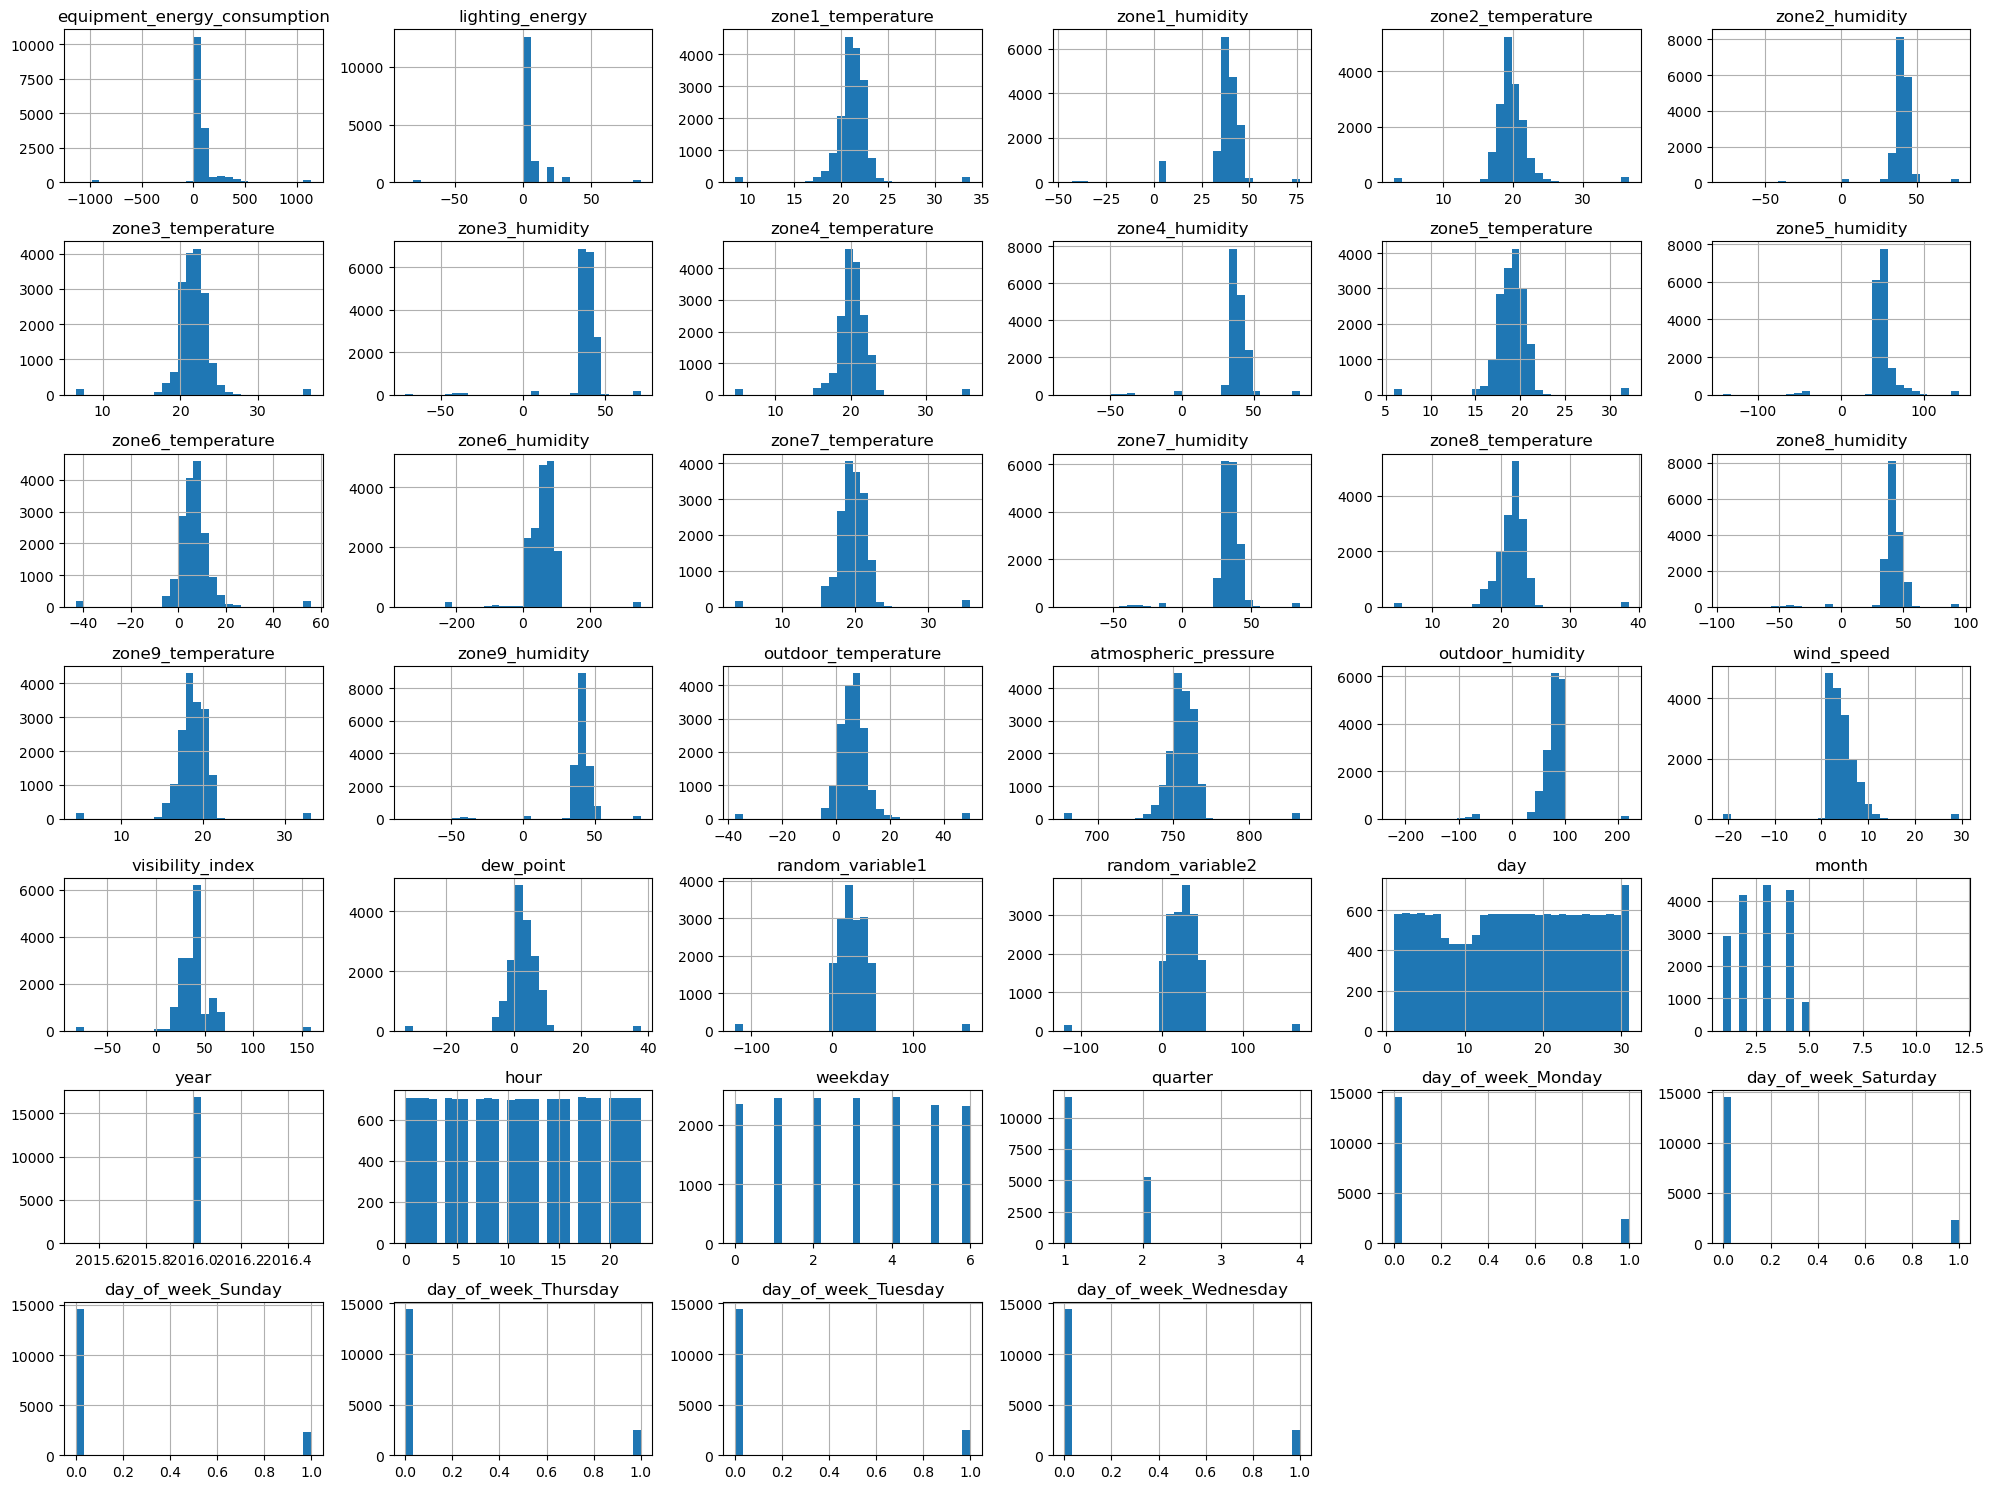

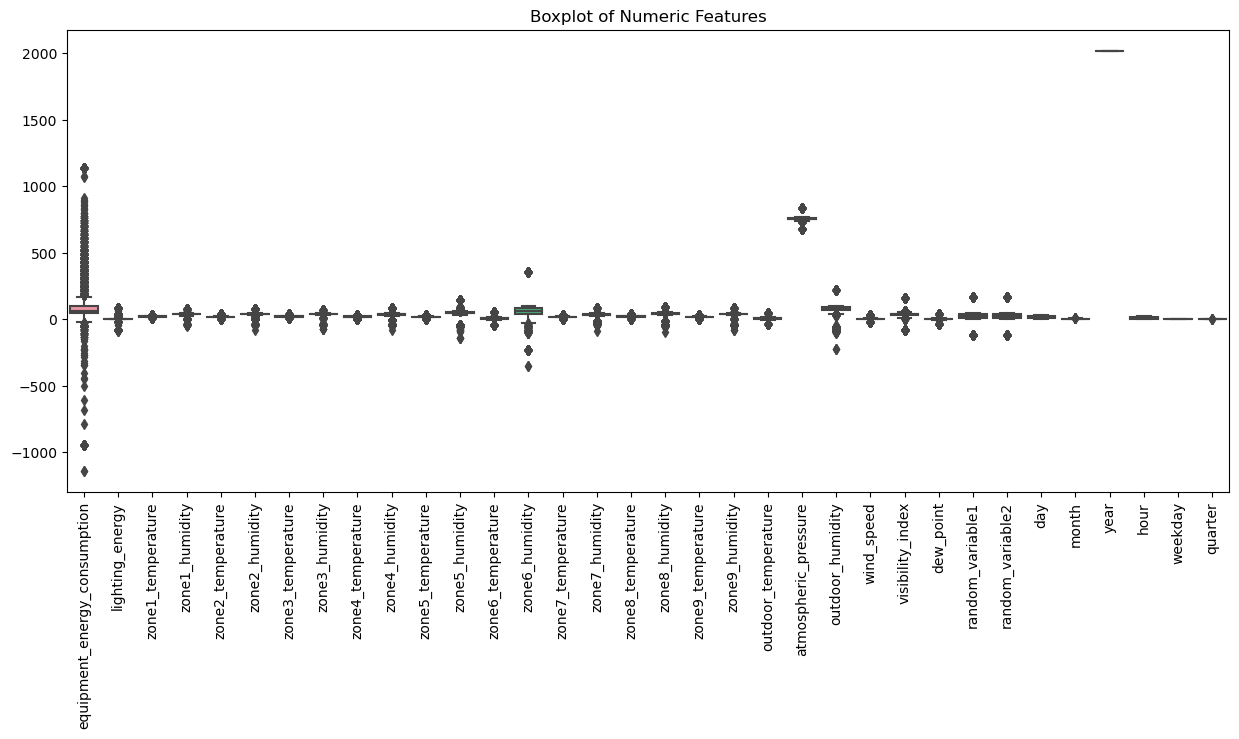

In [166]:

# Histogram for distribution of numeric columns
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Boxplot to see distributions and potential outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features")
plt.show()


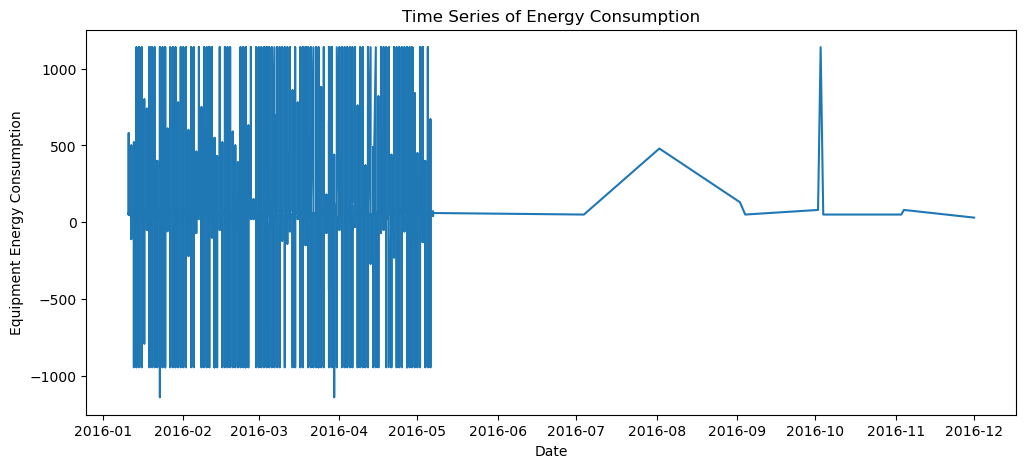

In [11]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])
plt.figure(figsize=(12, 5))
plt.plot(df['datetime'], df['equipment_energy_consumption'])
plt.xlabel("Date")
plt.ylabel("Equipment Energy Consumption")
plt.title("Time Series of Energy Consumption")
plt.show()



# Outliers Treatment


In [103]:
from scipy.stats import zscore

numeric_cols = df.select_dtypes(include='number').columns

z_scores = df[numeric_cols].apply(zscore)

df_clean = df[(z_scores.abs() < 3).all(axis=1)]

print(f"Shape after removing outliers using Z-score: {df_clean.shape}")


Shape after removing outliers using Z-score: (0, 40)


In [104]:
df.isnull().sum().sort_values(ascending=False)


zone1_humidity                  87
zone1_temperature               82
zone2_temperature               70
equipment_energy_consumption    68
lighting_energy                 55
year                             0
visibility_index                 0
dew_point                        0
random_variable1                 0
random_variable2                 0
day                              0
month                            0
weekday                          0
hour                             0
outdoor_humidity                 0
quarter                          0
day_of_week_Monday               0
day_of_week_Saturday             0
day_of_week_Sunday               0
day_of_week_Thursday             0
day_of_week_Tuesday              0
wind_speed                       0
outdoor_temperature              0
atmospheric_pressure             0
zone5_humidity                   0
zone2_humidity                   0
zone3_temperature                0
zone3_humidity                   0
zone4_temperature   

In [106]:
cols_to_impute = ['zone1_humidity', 'zone1_temperature', 'zone2_temperature',
                  'equipment_energy_consumption', 'lighting_energy']

for col in cols_to_impute:
    df[col].fillna(df[col].mean(), inplace=True)


# Drop Columns

In [108]:
drop_columns = [
    'day', 'month', 'year', 'weekday', 'quarter',         
    'day_of_week_Sunday',                                
    'random_variable1', 'random_variable2', 'lighting_energy', 
    'day_of_week_Monday', 
    'day_of_week_Saturday', 
    'day_of_week_Sunday', 
    'day_of_week_Thursday', 
    'day_of_week_Tuesday', 
    'day_of_week_Wednesday'
] 

df = df.drop(columns=columns_to_drop)


# Correlation

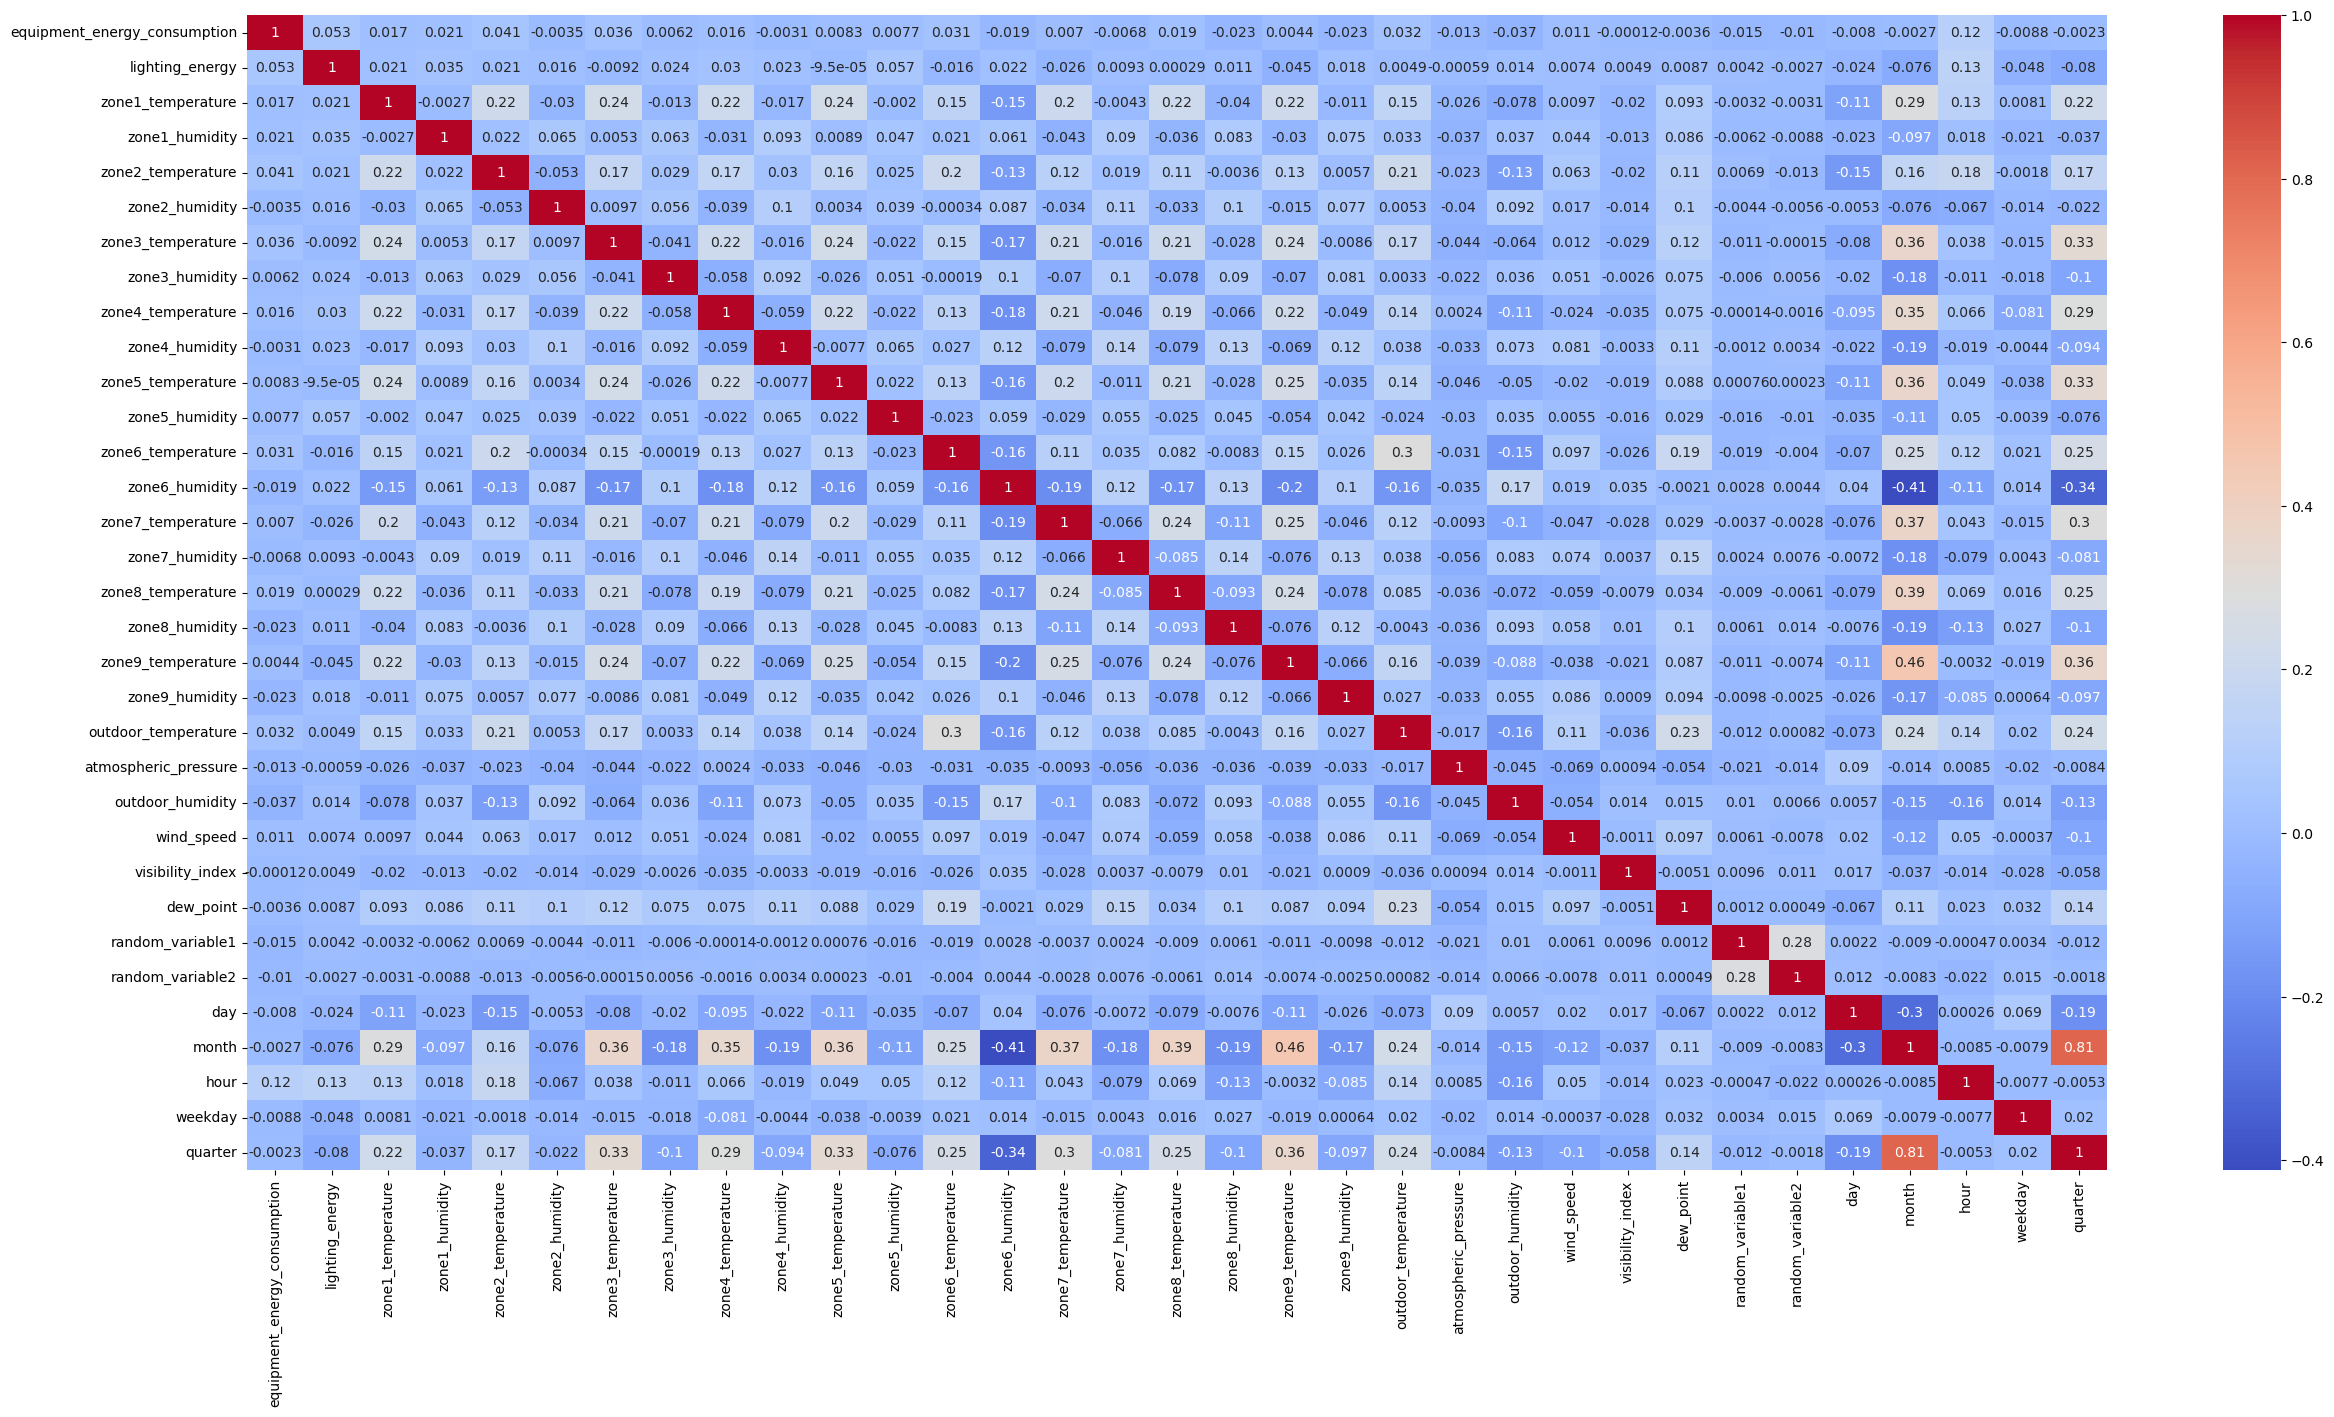

In [110]:

correlation_matrix = df.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()


In [111]:
var=['zone2_temperature', 'zone2_humidity', 'zone3_temperature',
       'zone3_humidity', 'zone4_temperature', 'zone4_humidity',
       'zone5_temperature', 'zone5_humidity', 'zone6_temperature',
       'zone6_humidity','day', 'month', 'hour','weekday', 'quarter']

In [112]:
df = df.drop(columns=var) 

In [113]:
df = df.drop(columns=['zone1_humidity'])  

# Data Preprocessing

In [114]:
from sklearn.preprocessing import StandardScaler

columns_to_scale =['equipment_energy_consumption', 'zone1_temperature',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


# Train Test Split

In [115]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['equipment_energy_consumption'])
y = df['equipment_energy_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest Mean Absolute Error: {mae_rf}')
print(f'Random Forest R² Score: {r2_rf}')


Random Forest Mean Squared Error: 0.9893344748470556
Random Forest Mean Absolute Error: 0.429379274388595
Random Forest R² Score: 0.029623669269136177


# Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Mean Squared Error: {mse_lr}')
print(f'Linear Regression Mean Absolute Error: {mae_lr}')
print(f'Linear Regression R² Score: {r2_lr}')


Linear Regression Mean Squared Error: 1.019335195195208
Linear Regression Mean Absolute Error: 0.4381749204494052
Linear Regression R² Score: 0.0001978383991227961


# XGBoost

In [89]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost Mean Absolute Error: {mae_xgb}')
print(f'XGBoost R² Score: {r2_xgb}')


XGBoost Mean Squared Error: 1.0773735611903066
XGBoost Mean Absolute Error: 0.4912205834998736
XGBoost R² Score: -0.05672836610279264


# Gradient Descent

In [88]:

learning_rate = 0.01
iterations = 1000
m = len(X_train)

X_train_bias = np.c_[np.ones((m, 1)), X_train]
X_test_bias = np.c_[np.ones((len(X_test), 1)), X_test]

theta = np.zeros(X_train_bias.shape[1])

for i in range(iterations):
    predictions = X_train_bias.dot(theta)
    error = predictions - y_train
    gradient = (1/m) * X_train_bias.T.dot(error)
    theta -= learning_rate * gradient

y_pred_gd = X_test_bias.dot(theta)

mse_gd = mean_squared_error(y_test, y_pred_gd)
mae_gd = mean_absolute_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

print(f'Gradient Descent Mean Squared Error: {mse_gd}')
print(f'Gradient Descent Mean Absolute Error: {mae_gd}')
print(f'Gradient Descent R² Score: {r2_gd}')


Gradient Descent Mean Squared Error: 1.0193349553738076
Gradient Descent Mean Absolute Error: 0.4381750038440752
Gradient Descent R² Score: 0.00019807362494039804


# Conclusion
- Based on the MSE, Random Forest is the best model with the lowest MSE of 0.983, followed by Linear Regression
and Gradient Descent, while XGBoost performs the worst with a higher MSE of 1.077. Thus, Random Forest is the most
suitable model for this task.